In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib as mpl
from sklearn.linear_model import Ridge
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import scipy.spatial.distance as spd
import ResidualDecomposition as RD

np.random.seed(0)

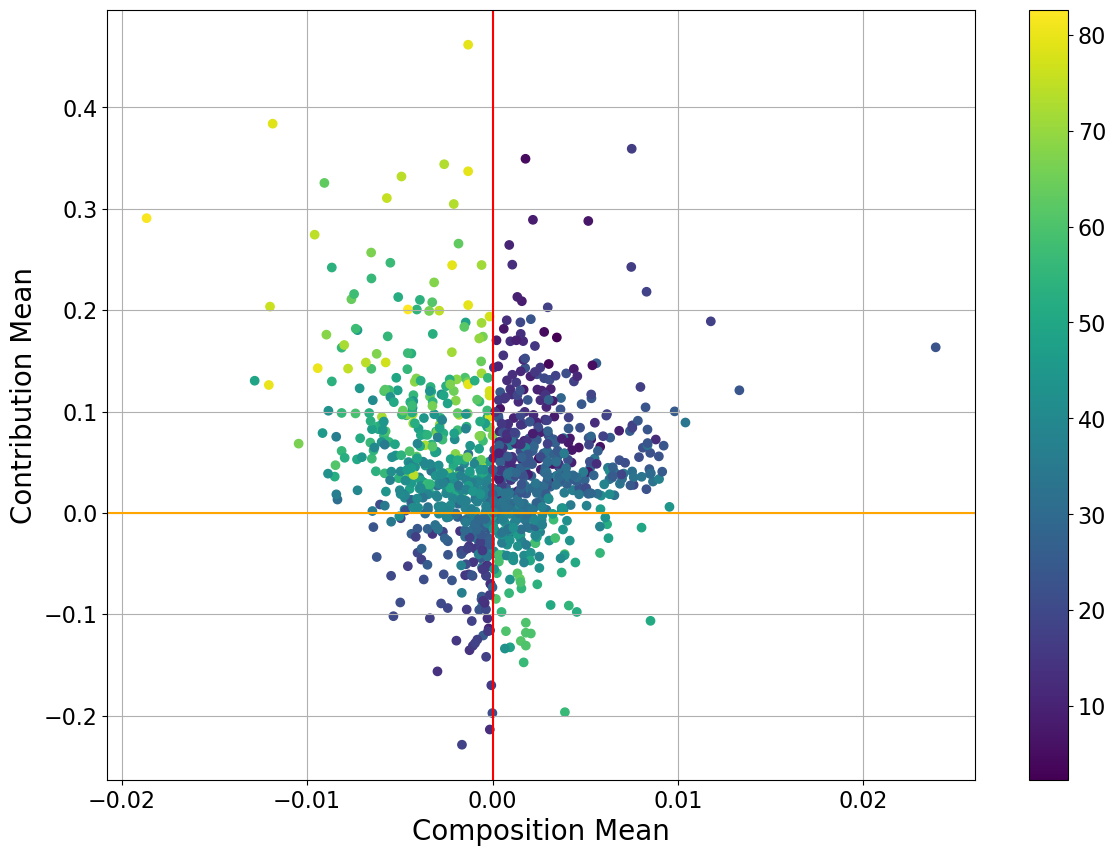

In [21]:
data = pd.read_csv("Datasets/P_compressive_concrete.csv")
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

rshap = np.genfromtxt("Data/Concrete_RF.csv", delimiter=',')
rcomposition = rshap
rcontributon = (rshap.T * -np.sign(np.sum(rshap, axis=0))).T

plt.figure(figsize=(14,10))
plt.scatter(np.mean(rcomposition, axis=0), np.mean(rcontributon, axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/concrete_CC_rf.pdf", bbox_inches="tight")

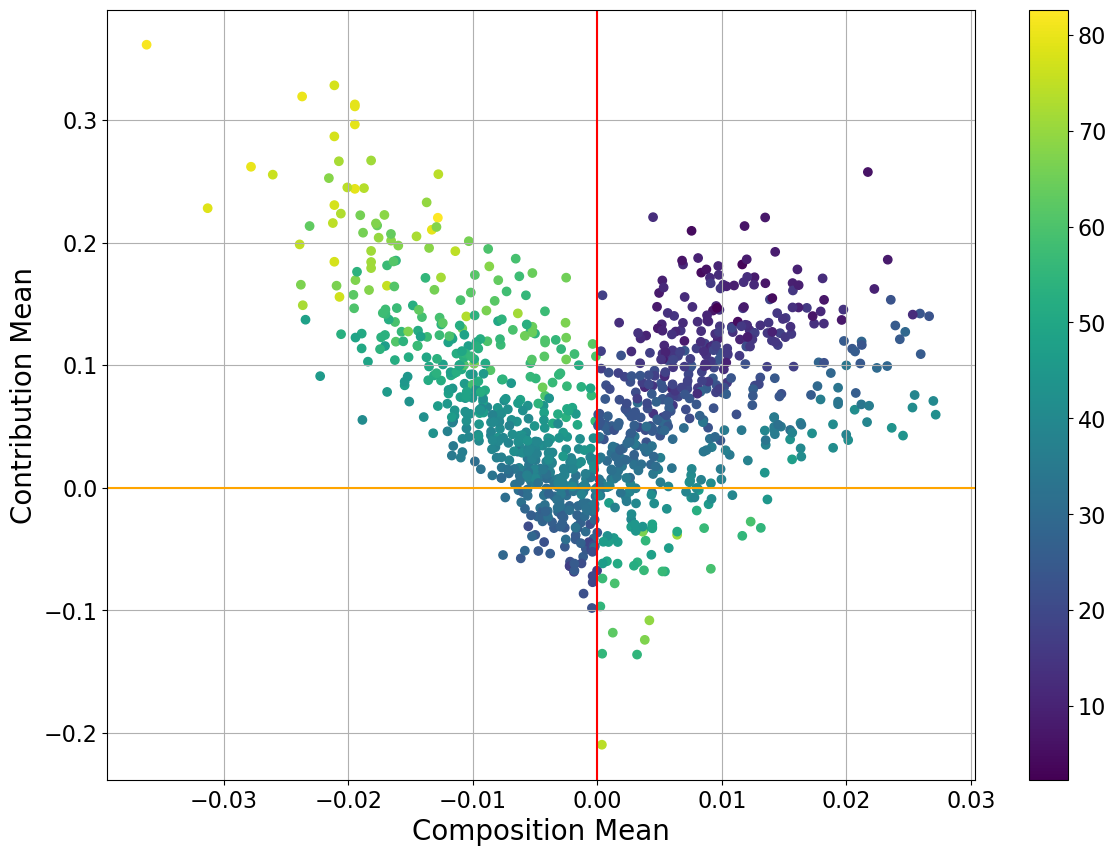

In [22]:
data = pd.read_csv("Datasets/P_compressive_concrete.csv")
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

rshap = np.genfromtxt("Data/Concrete_Ridge.csv", delimiter=',')
rcomposition = rshap
rcontributon = (rshap.T * -np.sign(np.sum(rshap, axis=0))).T

plt.figure(figsize=(14,10))
plt.scatter(np.mean(rcomposition, axis=0), np.mean(rcontributon, axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/concrete_CC_ridge.pdf", bbox_inches="tight")

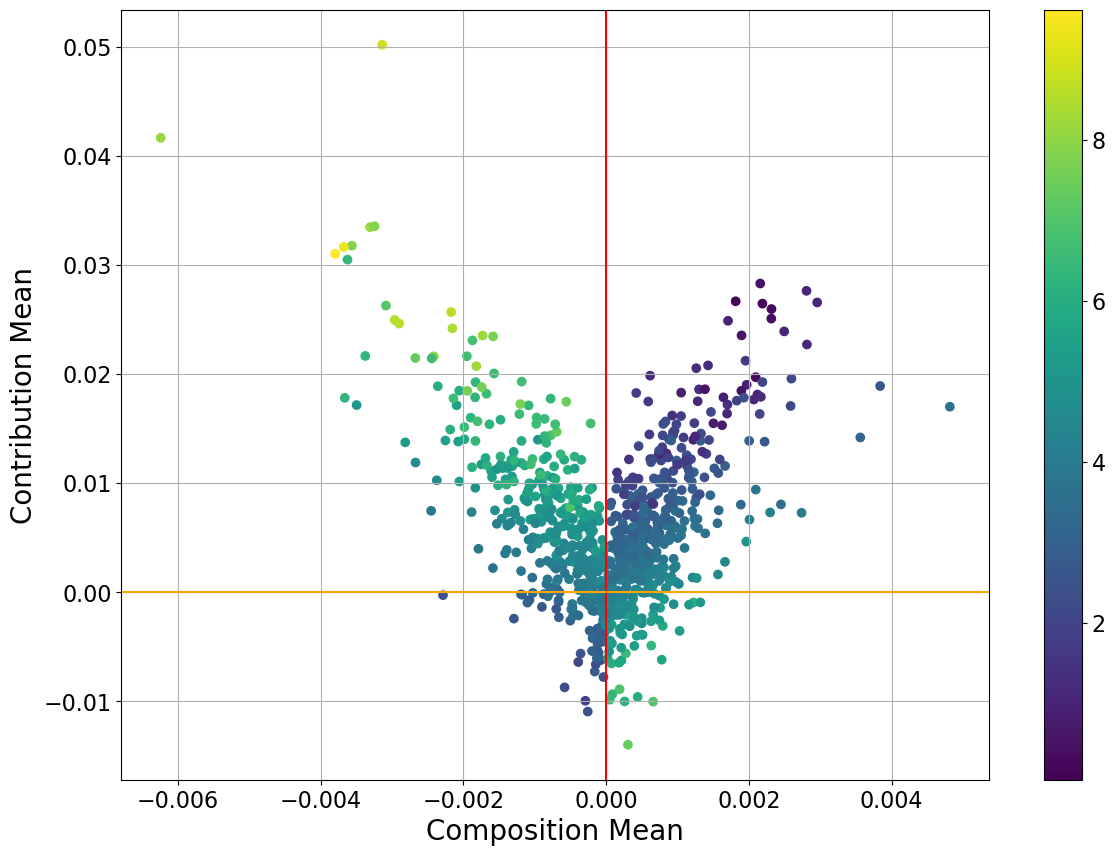

In [34]:
data = pd.read_csv("Datasets/P_fish_toxicity.csv")
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

rshap = np.genfromtxt("Data/Fish_Ridge.csv", delimiter=',')
rcomposition = rshap
rcontributon = (rshap.T * -np.sign(np.sum(rshap, axis=0))).T

plt.figure(figsize=(14,10))
plt.scatter(np.mean(rcomposition, axis=0), np.mean(rcontributon, axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/fish_CC_ridge.pdf", bbox_inches="tight")

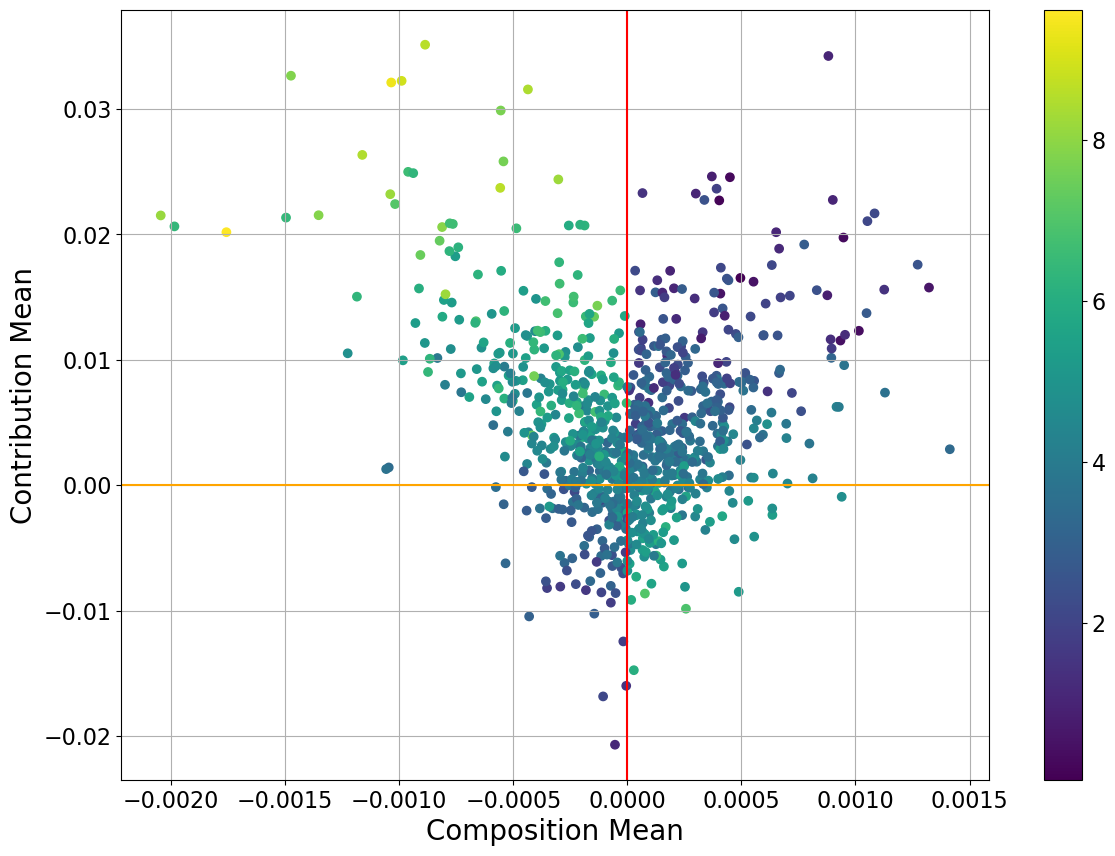

In [37]:
data = pd.read_csv("Datasets/P_fish_toxicity.csv")
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

rshap = np.genfromtxt("Data/Fish_rf.csv", delimiter=',')
rcomposition = rshap
rcontributon = (rshap.T * -np.sign(np.sum(rshap, axis=0))).T

plt.figure(figsize=(14,10))
plt.scatter(np.mean(rcomposition, axis=0), np.mean(rcontributon, axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/fish_CC_rf.pdf", bbox_inches="tight")

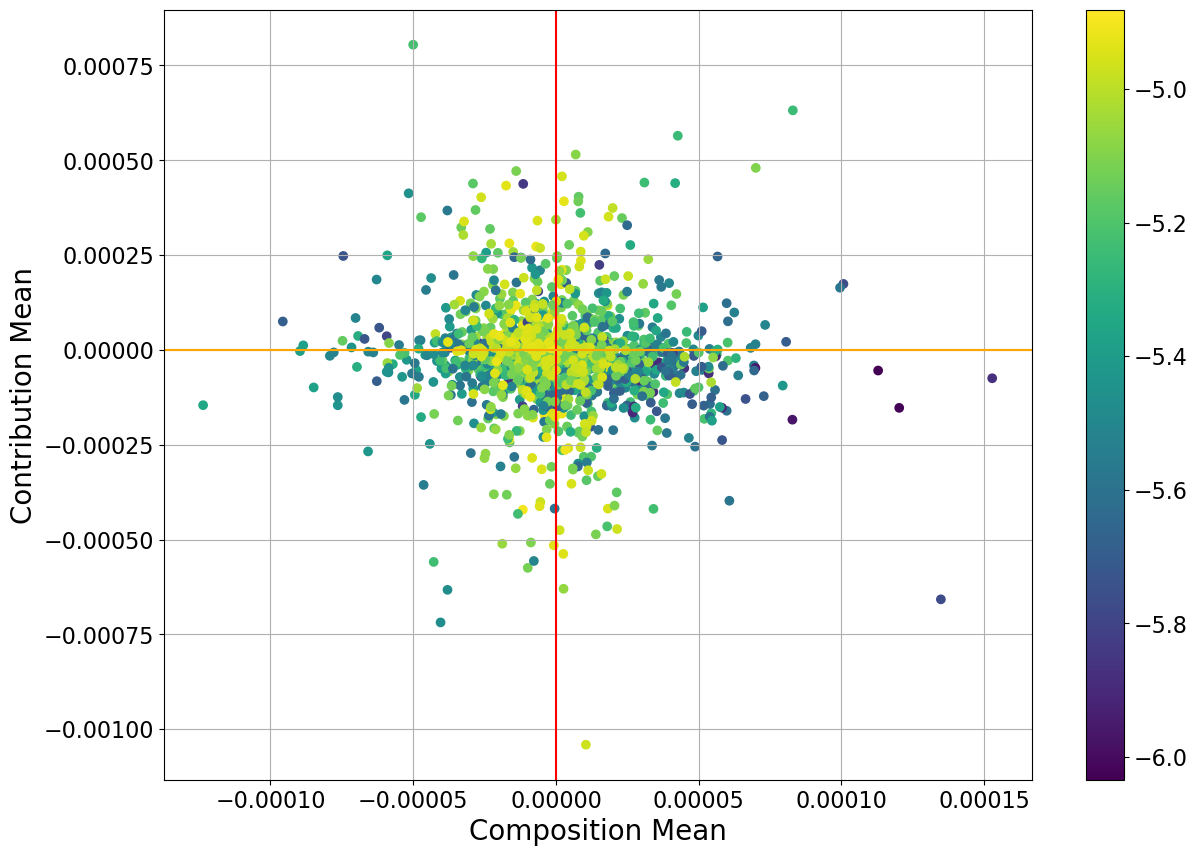

In [13]:
data = pd.read_csv("Datasets/P_Graphene_Oxide_PCA10.csv")
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

rshap = np.genfromtxt("Data/GO_ridge.csv", delimiter=',')
rcomposition = rshap
rcontributon = rshap * -np.sign(np.sum(rshap, axis=0))

plt.figure(figsize=(14,10))
plt.scatter(np.mean(rcomposition, axis=0), np.mean(rcontributon, axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/GO_ridge.pdf", bbox_inches="tight")

In [76]:
D = np.array([[1,1], [1,2], [1,3],[1,4],[1,5],[0, 3], [2, 3], [0.5, 2], [0.5, 4], [1.5,2], [1.5,4]])
X = D[:,1].reshape(-1,1)
Y = D[:,0]

In [77]:
lr = Ridge()
rshap = RD.ResidualDecompositionSymmetricStopping()
rshap.fit(X, Y, lr)

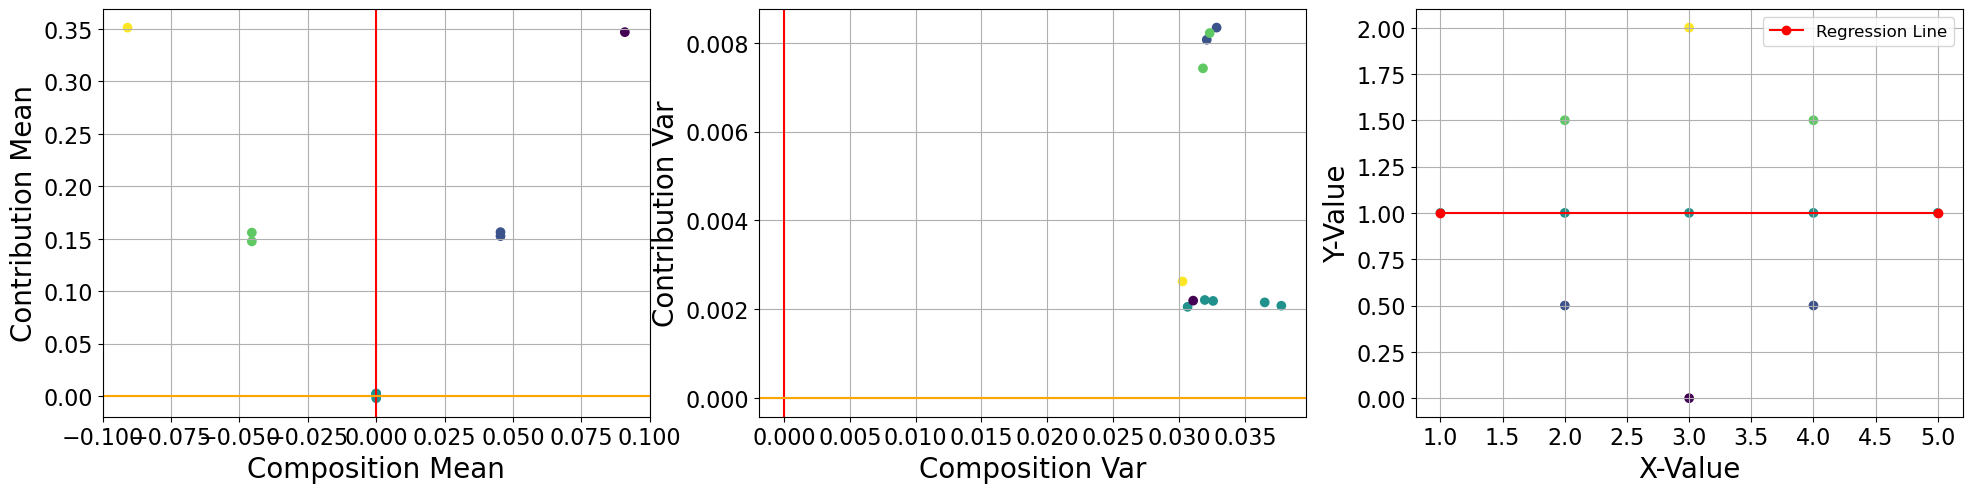

In [78]:
plt.figure(figsize=(24,18))

plt.subplot(331)

plt.scatter(np.mean(rshap.get_composition(), axis=0), np.mean(rshap.get_contribution(), axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(332)

plt.scatter(np.var(rshap.get_composition(), axis=0), np.var(rshap.get_contribution(), axis=1), c=Y)
plt.xlabel("Composition Var", fontsize=20)
plt.ylabel("Contribution Var", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(333)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(X, Y, c=Y)
plt.grid(True)
plt.xlabel("X-Value", fontsize=20)
plt.ylabel("Y-Value", fontsize=20)

plt.plot([np.min(X), np.max(X)], \
         [lr.coef_.flatten() * np.min(X) + lr.intercept_ , lr.coef_ * np.max(X) + lr.intercept_], \
         'ro-', label='Regression Line')
plt.legend(fontsize=12)

plt.savefig("Figures/ToyA.pdf", bbox_inches="tight")

In [79]:
D = np.array([[1,1], [1,2], [1,3],[1,4],[1,5],[2,1],[0,1],[0,5],[2,5]])
X = D[:,1].reshape(-1,1)
Y = D[:,0]

In [80]:
lr = Ridge()
rshap = RD.ResidualDecompositionSymmetricStopping()
rshap.fit(X, Y, lr)

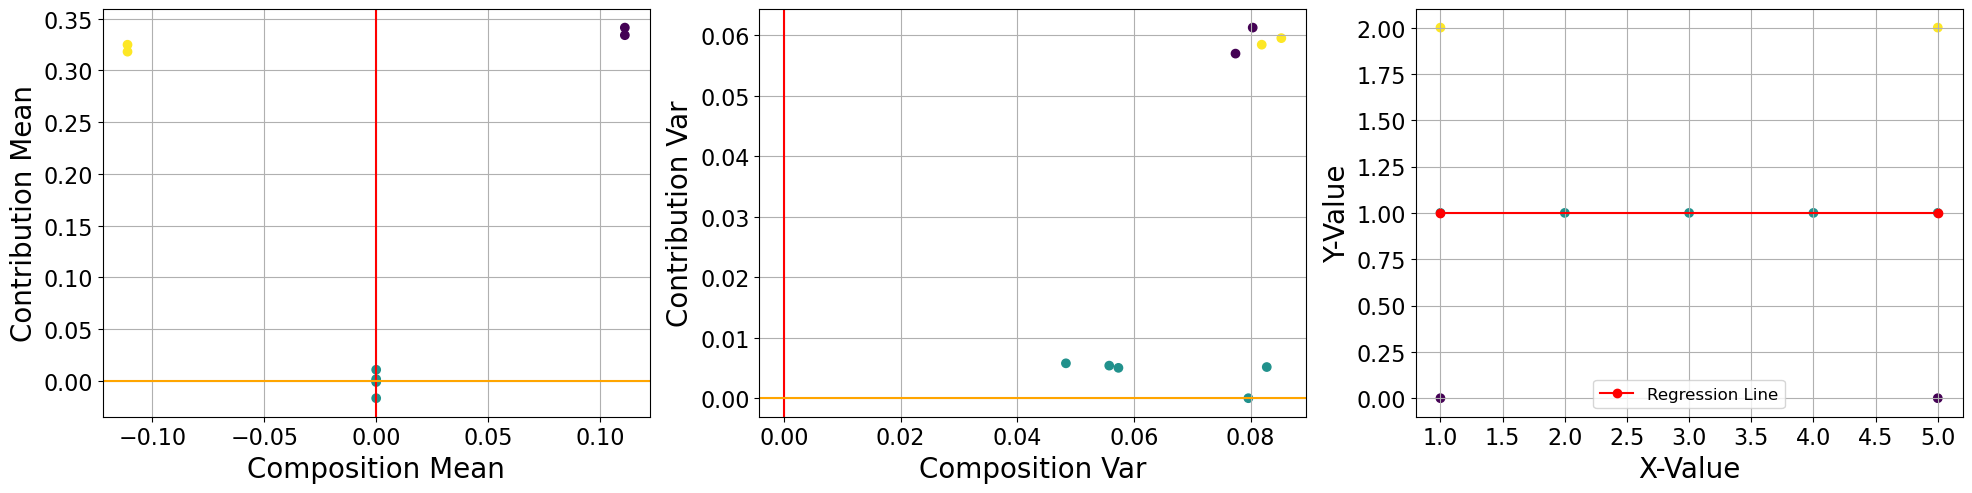

In [81]:
plt.figure(figsize=(24,18))

plt.subplot(331)

plt.scatter(np.mean(rshap.get_composition(), axis=0), np.mean(rshap.get_contribution(), axis=1), c=Y)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(332)

plt.scatter(np.var(rshap.get_composition(), axis=0), np.var(rshap.get_contribution(), axis=1), c=Y)
plt.xlabel("Composition Var", fontsize=20)
plt.ylabel("Contribution Var", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(333)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(X, Y, c=Y)
plt.grid(True)
plt.xlabel("X-Value", fontsize=20)
plt.ylabel("Y-Value", fontsize=20)

plt.plot([np.min(X), np.max(X)], \
         [lr.coef_.flatten() * np.min(X) + lr.intercept_ , lr.coef_ * np.max(X) + lr.intercept_], \
         'ro-', label='Regression Line')
plt.legend(fontsize=12)

plt.savefig("Figures/ToyB.pdf", bbox_inches="tight")

In [82]:
D = np.array([[1,1], [1,2], [1,3],[1,4],[1,5],[2,1], [2,2], [2,3],[2,4],[2,5],\
              [1.25,1], [1.25,2], [1.25,3],[1.25,4],[1.25,5],[1.75,1], [1.75,2], [1.75,3],[1.75,4],[1.75,5]])
X = D[:,1].reshape(-1,1)
Y = D[:,0]

In [83]:
lr = Ridge()
rshap = RD.ResidualDecompositionSymmetricStopping()
rshap.fit(X, Y, lr)

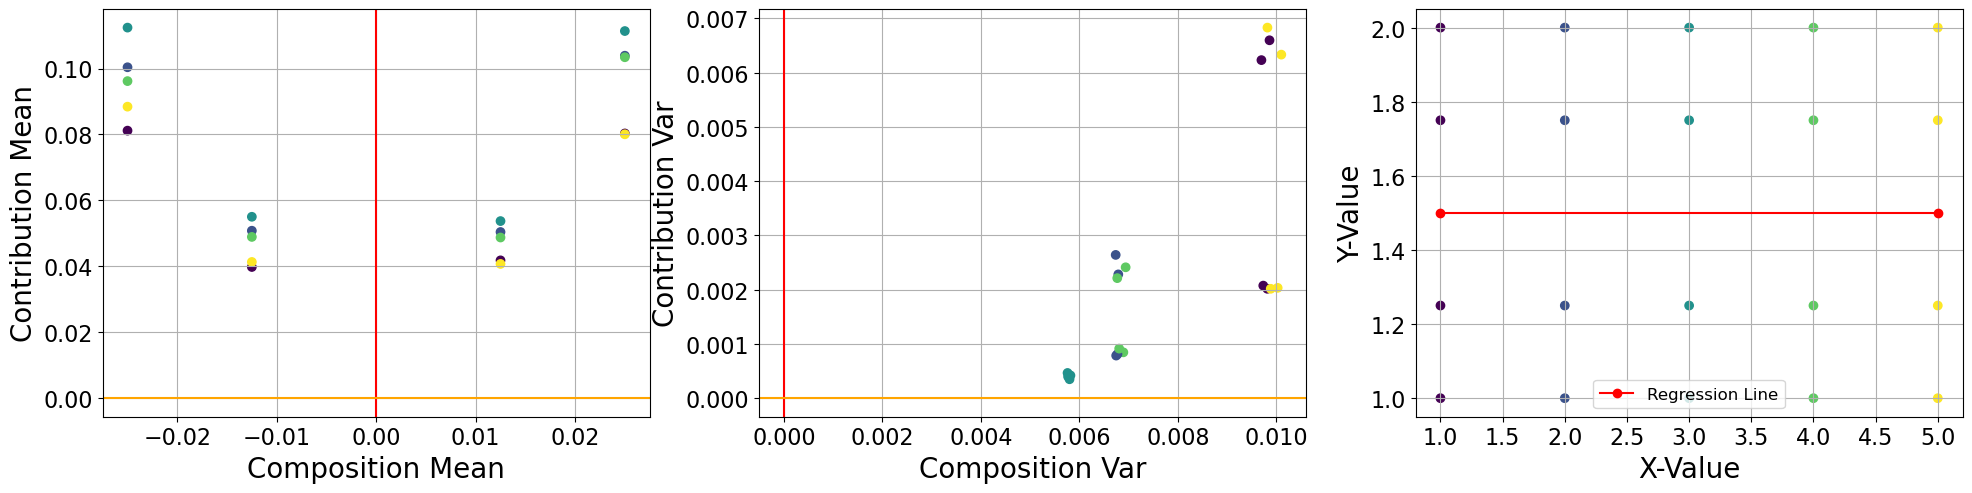

In [85]:
plt.figure(figsize=(24,18))

plt.subplot(331)

plt.scatter(np.mean(rshap.get_composition(), axis=0), np.mean(rshap.get_contribution(), axis=1), c=X)
plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(332)

plt.scatter(np.var(rshap.get_composition(), axis=0), np.var(rshap.get_contribution(), axis=1), c=X)
plt.xlabel("Composition Var", fontsize=20)
plt.ylabel("Contribution Var", fontsize=20)
plt.grid(True)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(333)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(X, Y, c=X)
plt.grid(True)
plt.xlabel("X-Value", fontsize=20)
plt.ylabel("Y-Value", fontsize=20)

plt.plot([np.min(X), np.max(X)], \
         [lr.coef_.flatten() * np.min(X) + lr.intercept_ , lr.coef_ * np.max(X) + lr.intercept_], \
         'ro-', label='Regression Line')
plt.legend(fontsize=12)

plt.savefig("Figures/ToyC.pdf", bbox_inches="tight")